# Leader board

Check out the latest challenge results here!

:::{tip}

Be sure to refresh the page to get the latest results.
:::

## Top 10 teams

Check out the evolution of the leading teams's progress!

In [1]:
# Rules of the game
MAX_GATES = 150
MAX_PARAMS = 60

# Leaderboard config
NUM_LEADERS = 10

# Helper function to compute total submission score
def compute_score(entry):
    # Accuracy 
    score = entry.Accuracy

    # Gate penalty
    score += 5 * (MAX_GATES - entry.Gates) / MAX_GATES

    # Params penalty
    score += 5 * (MAX_PARAMS - entry.Parameters) / MAX_PARAMS
    return score

/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49296 (\N{HANGUL SYLLABLE BBI}) missing from font(s) DejaVu Sans.
  func(*

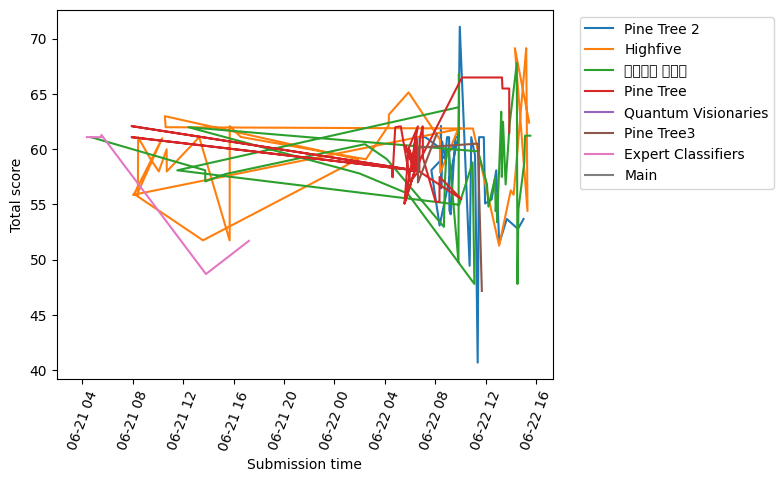

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve submissions and compute total score
results = pd.read_csv("results.csv", index_col=False)
results["Timestamp"] = pd.to_datetime(results.Timestamp, unit="s")
results.insert(1, "Score", results.apply(compute_score, axis=1))

# Get top teams, sorted by their highest scoring submission
gpby = results.groupby("Team")
top_teams = results.iloc[gpby.idxmax().Score].sort_values("Score", ascending=False)
leaders = top_teams[:NUM_LEADERS].reset_index(drop=True)

# Extract leading teams' data
agg = gpby.agg(list)
plt.xticks(rotation=70)
[plt.plot(agg.loc[team].Timestamp, agg.loc[team].Score) for team in leaders.Team]

# Make the plot pretty
plt.xlabel("Submission time")
plt.ylabel("Total score")
plt.legend(leaders.Team, bbox_to_anchor=(1.04, 1), loc="upper left");

In [3]:
leaders.rename(columns={"Score": "Top Score"})

,Team,Top Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Pine Tree 2,71.083333,23c124,2024-06-22 09:56:24,63.0,10,19
1,Highfive,69.133333,18325c,2024-06-22 15:12:36,60.0,6,8
2,소나무가 삐지면,67.800000,4e2f86,2024-06-22 14:27:57,60.0,11,22
3,Pine Tree,66.483333,b090f2,2024-06-22 10:06:39,58.0,8,15
4,Quantum Visionaries,62.083333,00ce1d,2024-06-21 03:45:55,54.0,10,19
5,Pine Tree3,61.383333,5ccd8d,2024-06-22 08:06:30,53.0,11,15
6,Expert Classifiers,61.283333,9b7ce8,2024-06-21 05:30:36,53.0,14,15
7,Main,61.083333,6e8482,2024-06-21 12:34:36,53.0,10,19


## Submission history

Please find all the challenge submissions below. Most recent submissions are at the top!

In [4]:
from IPython.display import display

history = results.sort_values("Timestamp", ascending=False).reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(history)

,Team,Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,소나무가 삐지면,61.216667,f2322c,2024-06-22 15:32:25,52.0,6,7
1,Highfive,62.400000,6a2d60,2024-06-22 15:26:51,53.0,3,6
2,Highfive,54.400000,0a0333,2024-06-22 15:18:45,45.0,3,6
3,Highfive,69.133333,2d2c11,2024-06-22 15:12:44,60.0,6,8
4,Highfive,69.133333,18325c,2024-06-22 15:12:36,60.0,6,8
5,소나무가 삐지면,61.216667,13d13e,2024-06-22 15:07:07,52.0,6,7
6,소나무가 삐지면,58.800000,48334b,2024-06-22 15:03:40,51.0,11,22
7,Pine Tree 2,53.683333,4d2835,2024-06-22 15:00:10,46.0,12,23
8,소나무가 삐지면,54.566667,21498b,2024-06-22 14:35:38,45.0,3,4
9,Pine Tree 2,52.783333,528b57,2024-06-22 14:33:13,45.0,9,23
